[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/babbu3682/Med_ChatGPT_tutorial/blob/main/Notebook/Hands_On_EDA.ipynb)

# 데이터셋 다운로드

* kaggle 대회 링크: https://www.kaggle.com/competitions/rsna-breast-cancer-detection/overview
* 데이터셋 다운로드 링크: https://drive.google.com/drive/folders/1gSKvZ5BoSIt4Dk_LhdYOoMIBwREcVvwN?usp=sharing

# Dataset files

- ##### [train/test]_images/[patient_id]/[image_id].dcm
  - The mammograms, in dicom format. 
  - You can expect roughly 8,000 patients in the hidden test set.
  - There are usually but not always 4 images per patient. 
  - Note that many of the images use the jpeg 2000 format which may you may need special libraries to load.
#
- #### sample_submission.csv 
  - A valid sample submission.Only the first few rows are available for download.
#
- #### [train/test].csv Metadata for each patient and image. 
  - site_id - ID code for the source hospital.
  - patient_id - ID code for the patient.
  - image_id - ID code for the image.
  - laterality - Whether the image is of the left or right breast.
  - view - The orientation of the image. The default for a screening exam is to capture two views per breast.
  - age - The patient's age in years.
  - implant - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.
  - density - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.
  - machine_id - An ID code for the imaging device.
  - cancer - Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.
  - biopsy - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.
  - invasive - If the breast is positive for cancer, whether or not the cancer proved to be invasive. Only provided for train.
  - BIRADS - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.
  - prediction_id - The ID for the matching submission row. Multiple images will share the same prediction ID. Test only.
  - difficult_negative_case - True if the case was unusually difficult. Only provided for train.

In [1]:
'''
cd /workspace/sunggu/7.Mentor/Med_ChatGPT_tutorial/
'''

# 데이터셋 경로는 /content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset

from google.colab import drive
drive.mount('/content/drive')

/workspace/sunggu/7.Mentor/Med_ChatGPT_tutorial


In [ ]:
# /content에 Med_ChatGPT_tutorial 폴더가 생성.

!git clone https://github.com/babbu3682/Med_ChatGPT_tutorial.git

In [ ]:
!pip install -U kaggle

# 환경 변수 설정
import os

os.environ['KAGGLE_USERNAME'] = '...'
os.environ['KAGGLE_KEY']      = '...'

# 데이터셋 다운로드
!kaggle competitions download -c rsna-breast-cancer-detection -p /workspace/sunggu/data/RSNA2023/a

# EDA from the given csv

In [2]:
# 주의 binary category는 연속형으로 계산 가능하다, 그러나 3개 이상의 category는 연속형으로 계산 불가능하다.

In [83]:
'''
[Explore Data]
I want you to act as a data scientist and code for me. I have a csv file of [Mammography Breast Cancer dataset]. Please write code for data exploration scripts that identify patterns and trends in data using [Pandas, Seaborn and Matplotlib]. 

Here is my data information.

===INFO===
Path: “/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset/train.csv”
Path: “/content/Med_ChatGPT_tutorial/dataset/train.csv”
Description: 
“
- [train/test].csv Metadata for each patient and image. 
  - site_id - ID code for the source hospital.
  - patient_id - ID code for the patient.
  - image_id - ID code for the image.
  - laterality - Whether the image is of the left or right breast.
  - view - The orientation of the image. The default for a screening exam is to capture two views per breast.
  - age - The patient's age in years.
  - implant - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.
  - density - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.
  - machine_id - An ID code for the imaging device.
  - cancer - Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.
  - biopsy - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.
  - invasive - If the breast is positive for cancer, whether or not the cancer proved to be invasive. Only provided for train.
  - BIRADS - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.
  - prediction_id - The ID for the matching submission row. Multiple images will share the same prediction ID. Test only.
  - difficult_negative_case - True if the case was unusually difficult. Only provided for train.
”

Explore the relationship between each variable step by step using the following procedure.
    0. Print csv head or summary defining train_data
    1. Check the data type and number of nuique of each variable.
    2. Plot a histogram for each variable (kde=True).
    3. Boxplot for between a target variable and age variable.
    4. Check the variable type whether it is a numeric or categorical variable
    5. Correlation Matrix for only numeric variable (ax.xaxis.tick_top())
    6. Scatterplot matrix for only numeric variable (hue='cancer')
'''

"\n[Explore Data]\nI want you to act as a data scientist and code for me. I have a csv file of [Mammography Breast Cancer dataset]. Please write code for data exploration scripts that identify patterns and trends in data using [Pandas, Seaborn and Matplotlib]. \n\nHere is my data information.\n\nPath: “/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset/train.csv”\n\nDescription: \n“\n- [train/test].csv Metadata for each patient and image. \n  - site_id - ID code for the source hospital.\n  - patient_id - ID code for the patient.\n  - image_id - ID code for the image.\n  - laterality - Whether the image is of the left or right breast.\n  - view - The orientation of the image. The default for a screening exam is to capture two views per breast.\n  - age - The patient's age in years.\n  - implant - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.\n  - density - A rating for how dense the 

In [3]:
import pandas as pd

# CSV 파일 불러오기
train_data = pd.read_csv("/workspace/sunggu/7.Mentor/Med_ChatGPT_tutorial/dataset/train.csv")

# CSV 파일의 헤드 출력
print(train_data.head())

# 또는 CSV 파일의 요약 정보 출력
print(train_data.describe())


   site_id  patient_id    image_id laterality view   age  cancer  biopsy   
0        1       10130   388811999          L  MLO  71.0       1       1  \
1        1       10130   613462606          L   CC  71.0       1       1   
2        1       10130  1360338805          L   CC  71.0       1       1   
3        1       10130  1672636630          L  MLO  71.0       1       1   
4        1       10226   461614796          L  MLO  71.0       1       1   

   invasive  BIRADS  implant density  machine_id  difficult_negative_case  
0         1     0.0        0       B          49                    False  
1         1     0.0        0       B          49                    False  
2         1     0.0        0       B          49                    False  
3         1     0.0        0       B          49                    False  
4         1     0.0        0       C          49                    False  
           site_id    patient_id      image_id          age       cancer   
count  2316

In [100]:
# 변수 목록
variables = train_data.columns

# 각 변수의 데이터 타입과 고유값 개수 출력
for var in variables:
    data_type = train_data[var].dtype
    unique_count = train_data[var].nunique()
    print(f"변수 '{var}'의 데이터 타입: {data_type}, 고유값 개수: {unique_count}")


변수 'site_id'의 데이터 타입: int64, 고유값 개수: 2
변수 'patient_id'의 데이터 타입: int64, 고유값 개수: 1574
변수 'image_id'의 데이터 타입: int64, 고유값 개수: 2316
변수 'laterality'의 데이터 타입: object, 고유값 개수: 2
변수 'view'의 데이터 타입: object, 고유값 개수: 3
변수 'age'의 데이터 타입: float64, 고유값 개수: 57
변수 'cancer'의 데이터 타입: int64, 고유값 개수: 2
변수 'biopsy'의 데이터 타입: int64, 고유값 개수: 2
변수 'invasive'의 데이터 타입: int64, 고유값 개수: 2
변수 'BIRADS'의 데이터 타입: float64, 고유값 개수: 3
변수 'implant'의 데이터 타입: int64, 고유값 개수: 2
변수 'density'의 데이터 타입: object, 고유값 개수: 4
변수 'machine_id'의 데이터 타입: int64, 고유값 개수: 9
변수 'difficult_negative_case'의 데이터 타입: bool, 고유값 개수: 2


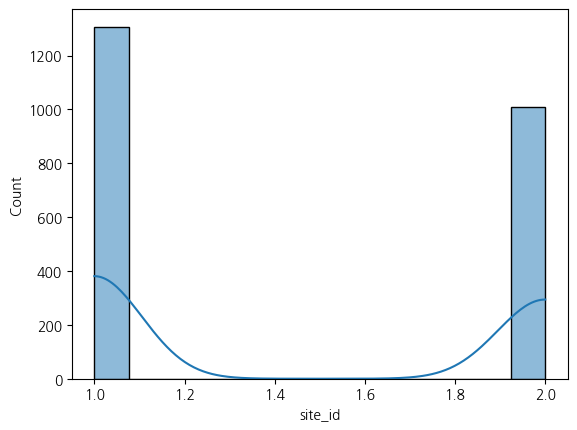

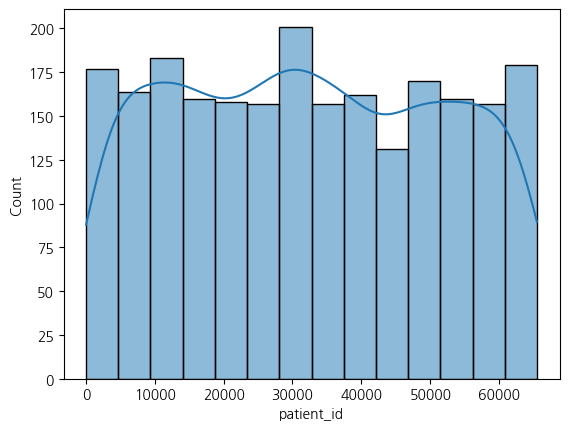

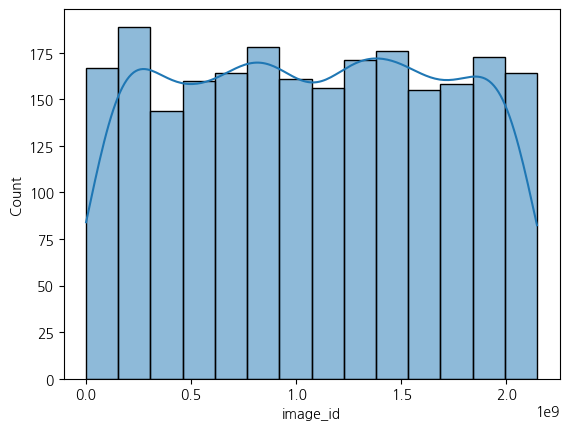

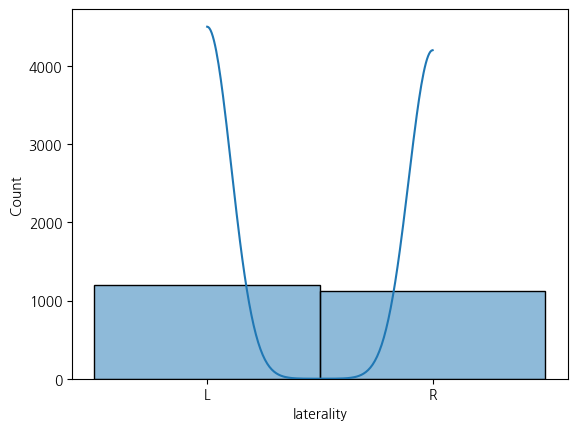

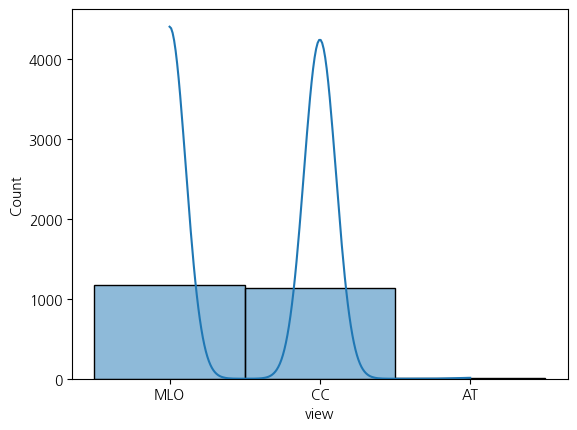

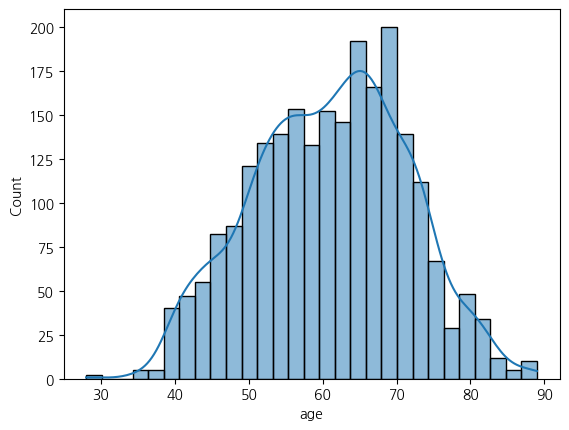

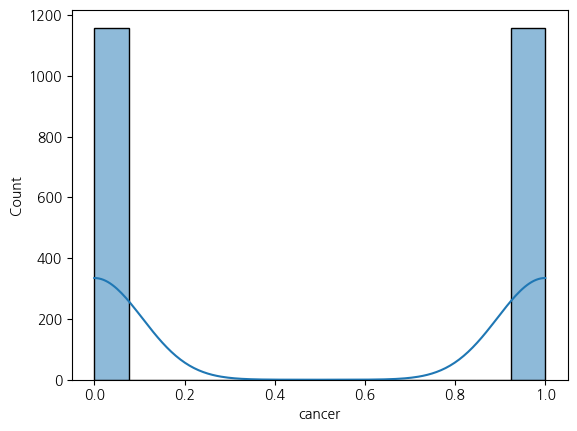

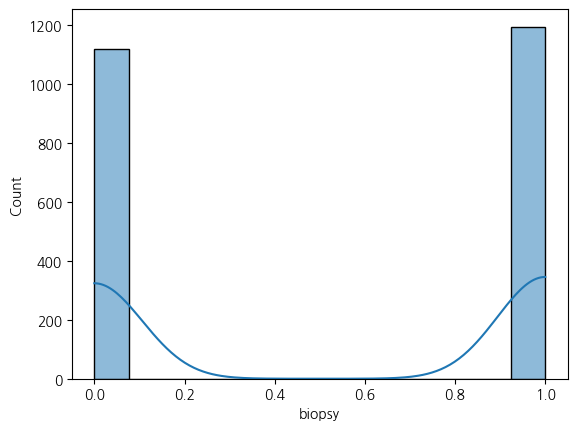

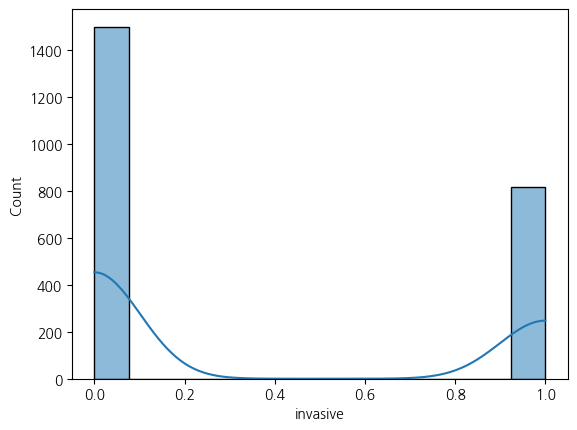

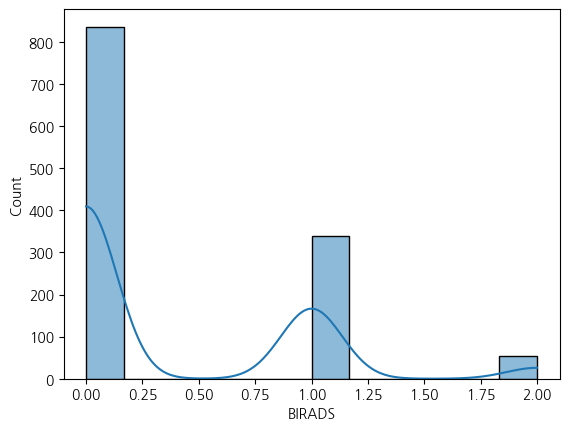

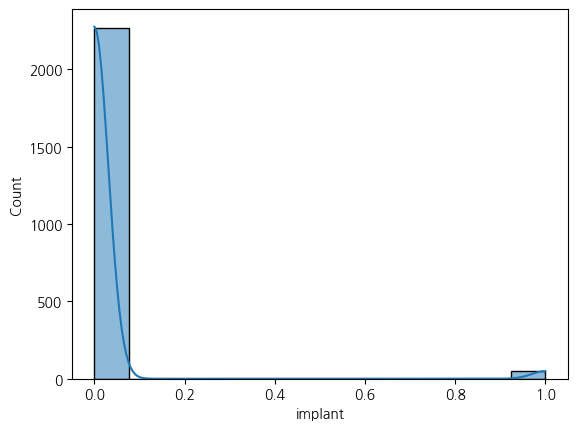

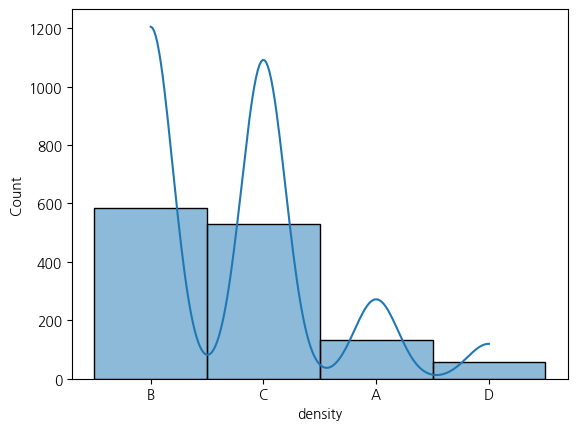

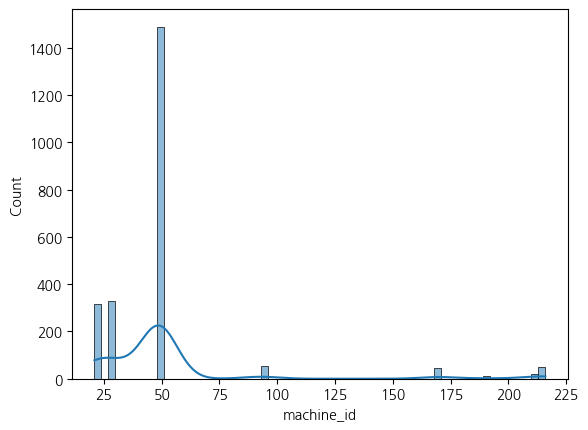

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


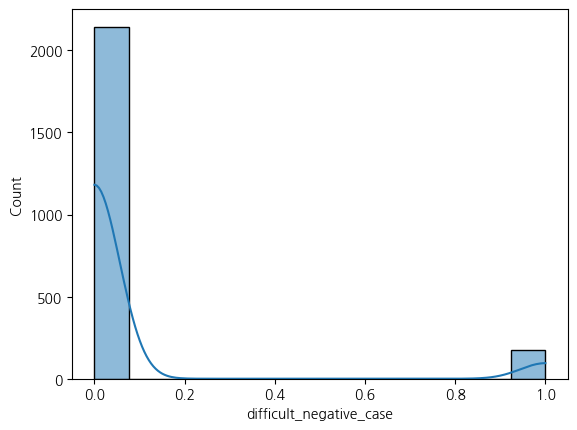

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 목록
variables = train_data.columns

# 히스토그램 그리기
for var in variables:
    sns.histplot(data=train_data, x=var, kde=True)
    plt.show()


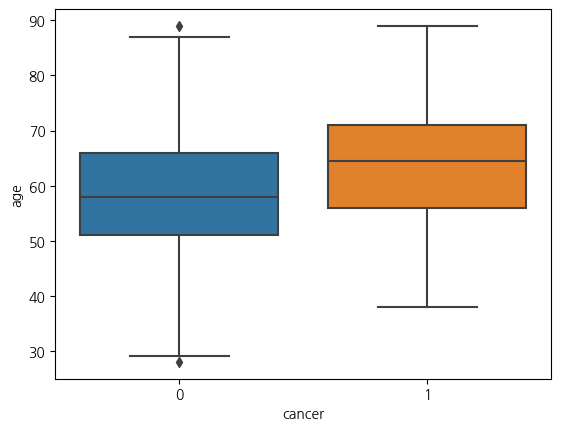

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# 타겟 변수와 나이 변수
target_variable = 'cancer'
age_variable = 'age'

# 박스 플롯 그리기
sns.boxplot(data=train_data, x=target_variable, y=age_variable)
plt.show()


In [103]:
# 변수 유형 확인
numeric_variables = train_data.select_dtypes(include='number').columns
categorical_variables = train_data.select_dtypes(include='object').columns

print("숫자형 변수:")
print(numeric_variables)

print("범주형 변수:")
print(categorical_variables)


숫자형 변수:
Index(['site_id', 'patient_id', 'image_id', 'age', 'cancer', 'biopsy',
       'invasive', 'BIRADS', 'implant', 'machine_id'],
      dtype='object')
범주형 변수:
Index(['laterality', 'view', 'density'], dtype='object')


/home/sunggu/.local/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/sunggu/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


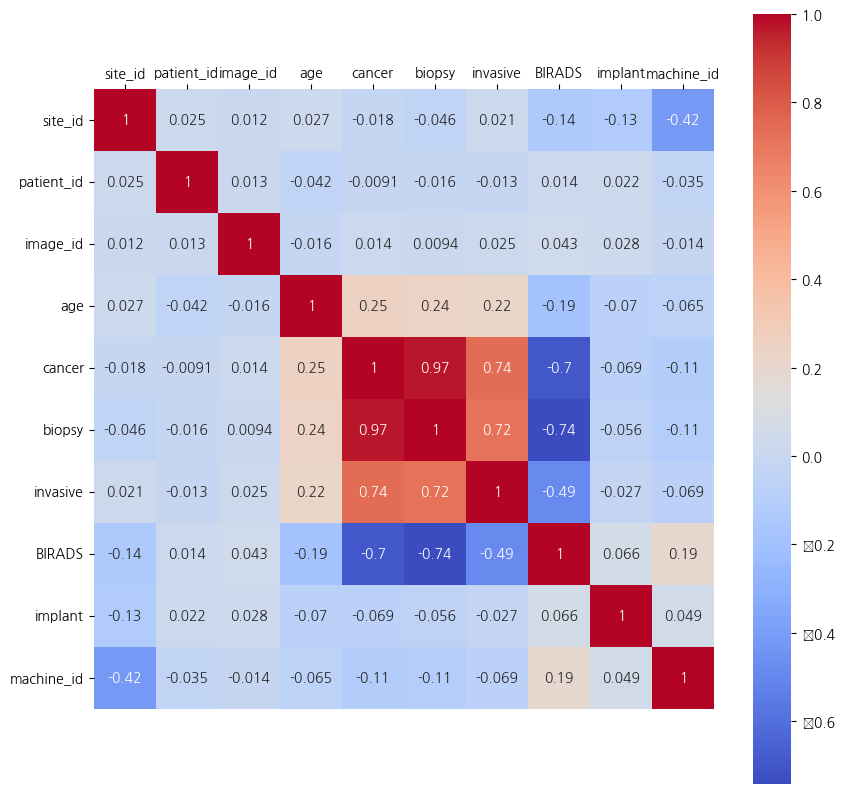

In [105]:
# 숫자형 변수만 선택
numeric_data = train_data.select_dtypes(include='number')

# 상관 행렬 출력
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', square=True)
ax.xaxis.tick_top()
plt.show()


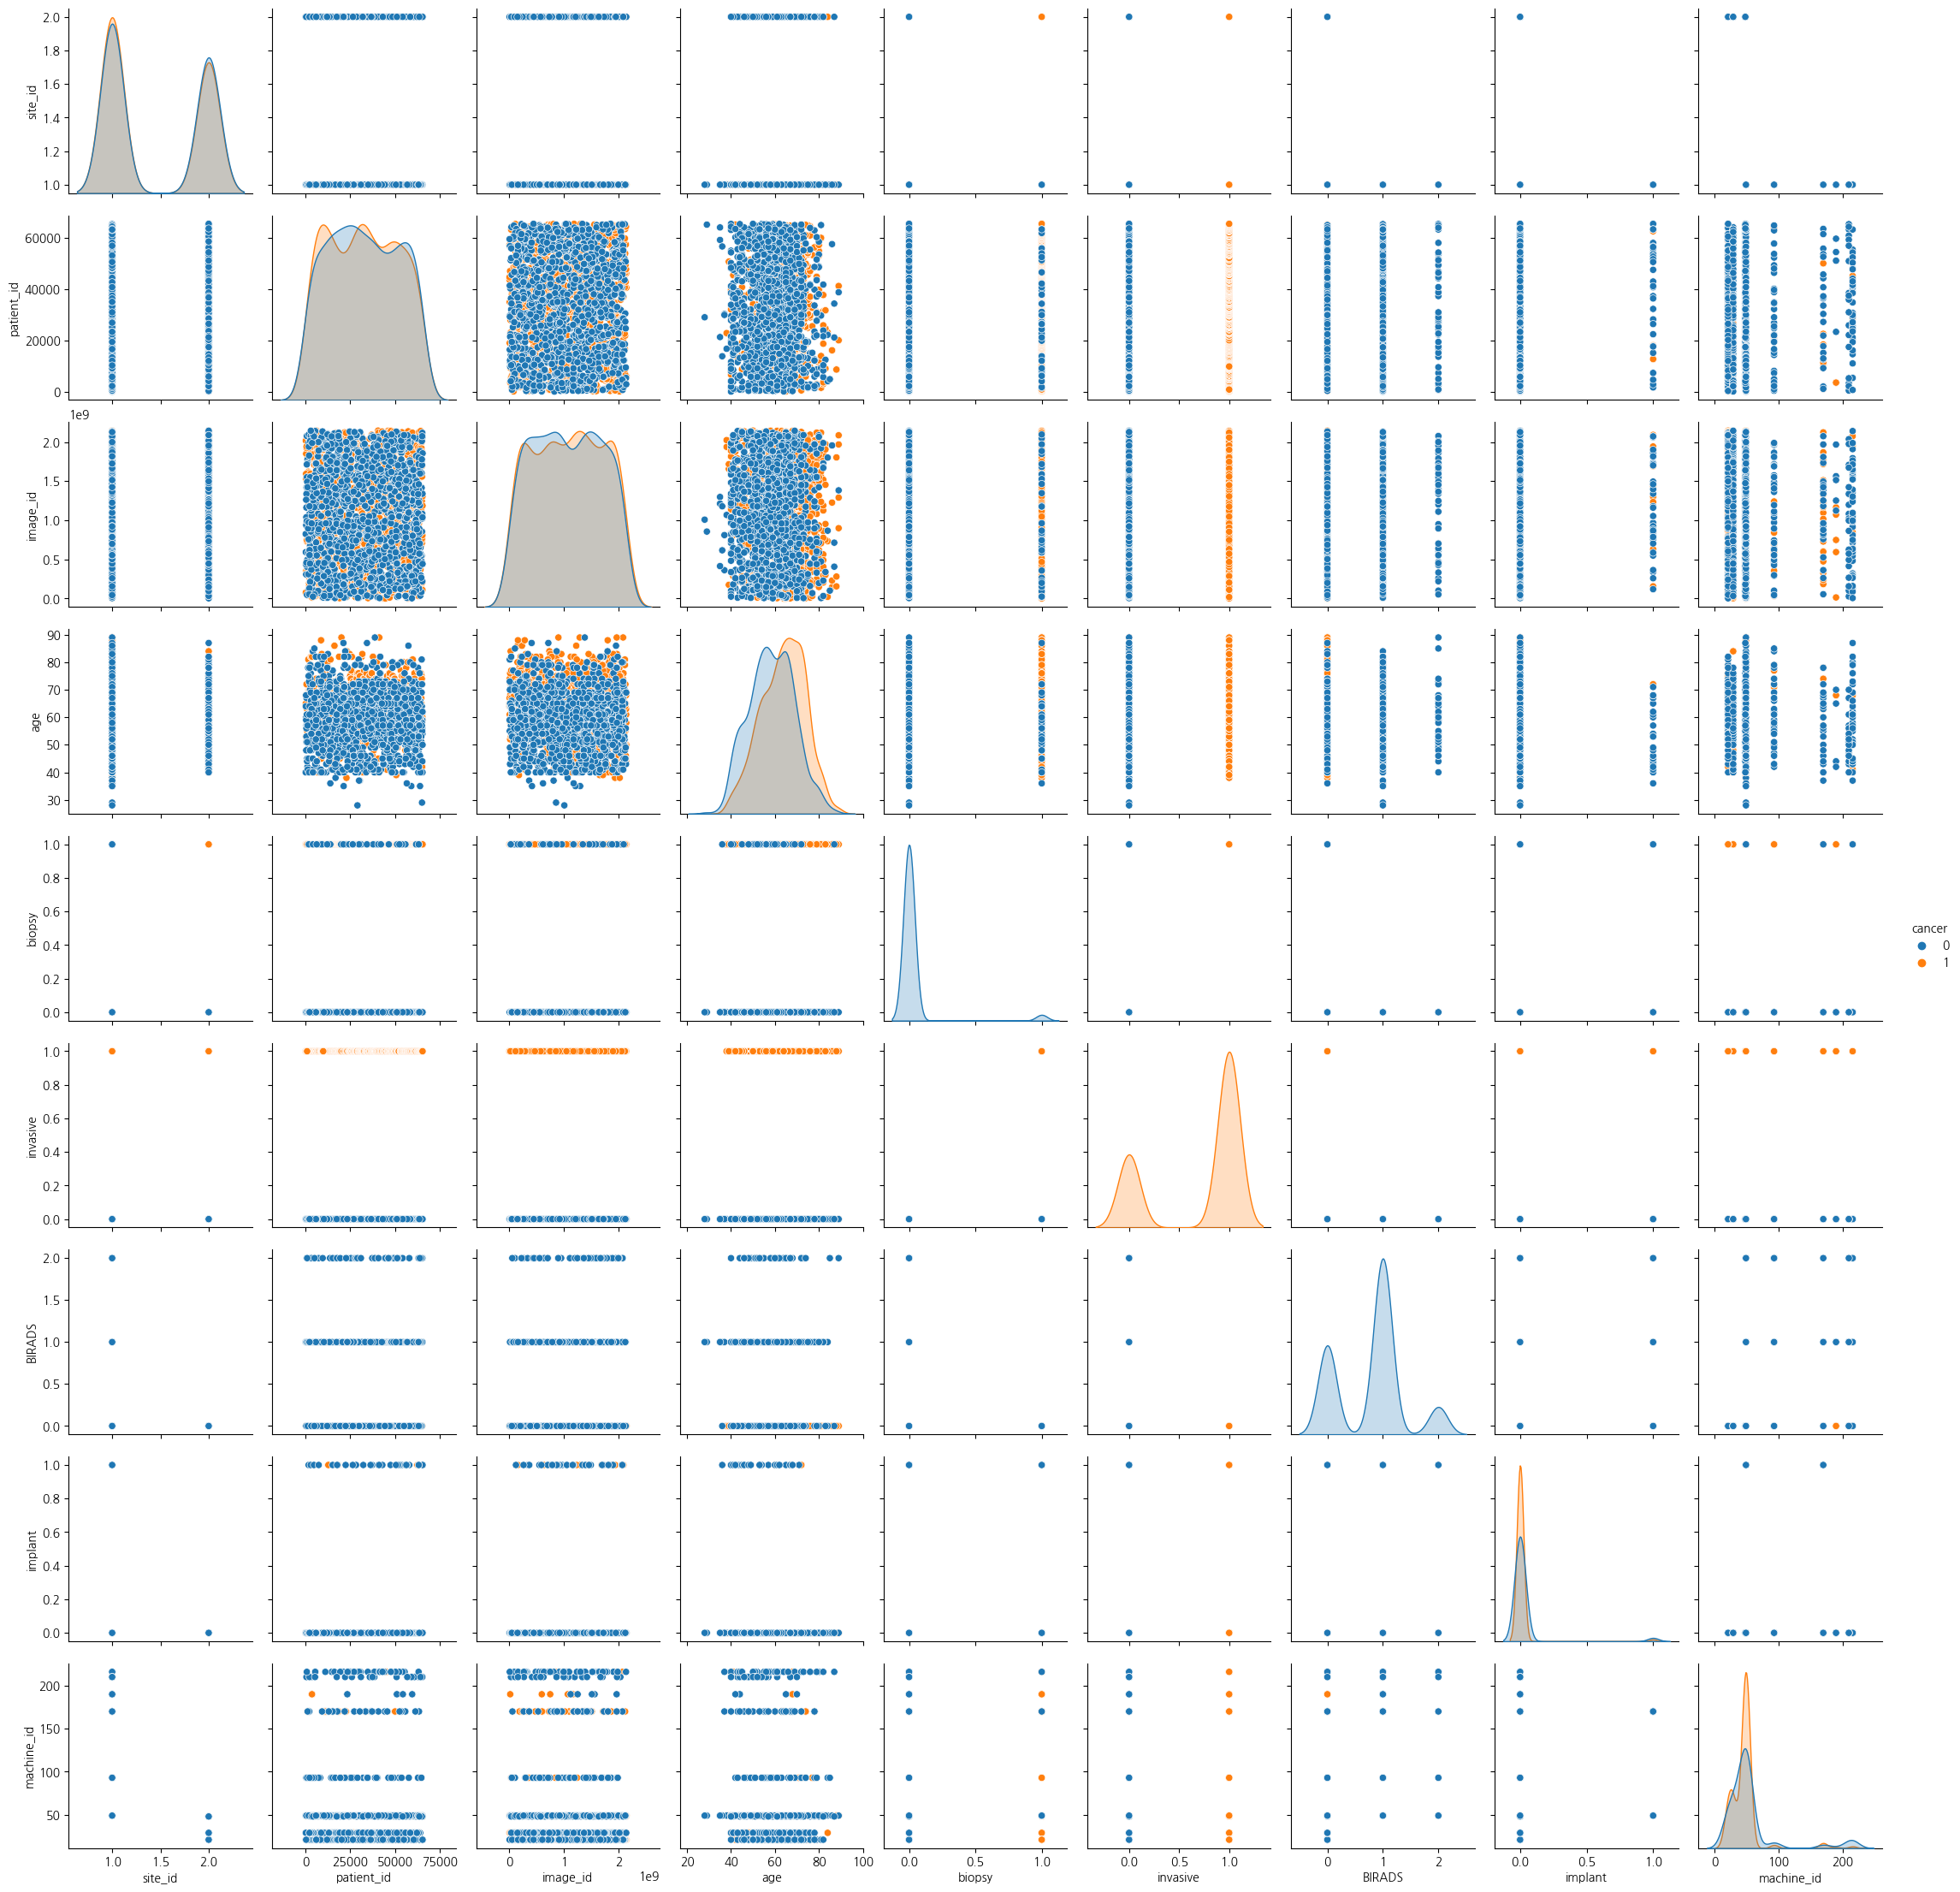

In [106]:
# 숫자형 변수만 선택
numeric_data = train_data.select_dtypes(include='number')

# 산점도 행렬 그리기
sns.pairplot(data=numeric_data, hue='cancer')
plt.show()


In [ ]:
'''
[Bug Fix]
Identify any logic errors in the following [python] code snippet: 
[Line No. 43, sns.heatmap(data.corr(), annot=True, cmap='coolwarm')].

Further details of the error are as follows:
[ValueError: could not convert string to float: 'L']

Suggestions: 
[I think you should check the data type of each variable whether it is not a string. If the variable is a string, the variable is excepted.]
'''

In [112]:
# test csv 불러오기
# test_data = pd.read_csv("/workspace/sunggu/7.Mentor/Med_ChatGPT_tutorial/dataset/test.csv")
test_data = pd.read_csv("/content/Med_ChatGPT_tutorial/dataset/test.csv")
test_data.head()

site_id  patient_id    image_id laterality view  age  implant  machine_id   
0        2       10008   736471439          L  MLO   81        0          21  \
1        2       10008  1591370361          L   CC   81        0          21   
2        2       10008    68070693          R  MLO   81        0          21   
3        2       10008   361203119          R   CC   81        0          21   

  prediction_id  
0       10008_L  
1       10008_L  
2       10008_R  
3       10008_R

- TEST에 집중.
- [laterality / view / age / implant]에 따른 cancer 비율 분석

In [ ]:
'''
Explore the relationship only among [laterality, view, age, implant] variable step by step using the following procedure.
    1. Check the data type and number of nuique of each variable.
    2. Examine cancer rates by each factor using pandas
    3. Correlation Matrix (ax.xaxis.tick_top())
    4. Scatterplot matrix (hue='cancer')
'''

In [117]:
# 변수 목록
variables = ['laterality', 'view', 'age', 'implant']

# 각 변수의 데이터 타입과 고유값 개수 출력
for var in variables:
    data_type = train_data[var].dtype
    unique_count = train_data[var].nunique()
    print(f"변수 '{var}'의 데이터 타입: {data_type}, 고유값 개수: {unique_count}")


변수 'laterality'의 데이터 타입: object, 고유값 개수: 2
변수 'view'의 데이터 타입: object, 고유값 개수: 3
변수 'age'의 데이터 타입: float64, 고유값 개수: 57
변수 'implant'의 데이터 타입: int64, 고유값 개수: 2


변수 'laterality'에 따른 암 발생률:
laterality
L    0.490818
R    0.509839
Name: cancer, dtype: float64
value_counts : 
laterality  cancer
L           0         610
            1         588
R           1         570
            0         548
Name: count, dtype: int64

변수 'view'에 따른 암 발생률:
view
AT     0.666667
CC     0.498678
MLO    0.500849
Name: cancer, dtype: float64
value_counts : 
view  cancer
AT    1           2
      0           1
CC    0         569
      1         566
MLO   1         590
      0         588
Name: count, dtype: int64

변수 'age'에 따른 암 발생률:


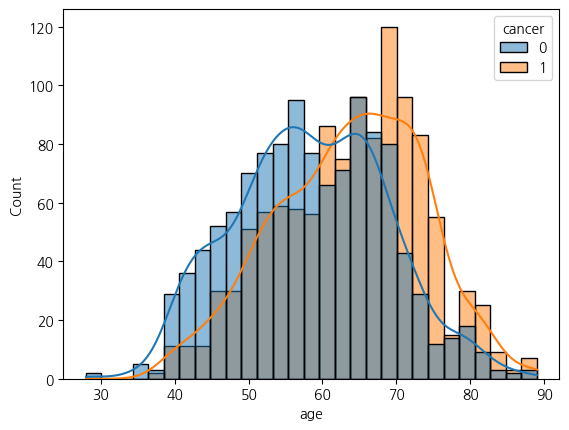

변수 'implant'에 따른 암 발생률:
implant
0    0.505073
1    0.265306
Name: cancer, dtype: float64
value_counts : 
implant  cancer
0        1         1145
         0         1122
1        0           36
         1           13
Name: count, dtype: int64



In [142]:
# 암 발생률 확인
for var in variables:
    if var != 'age':
        cancer_rates = train_data.groupby(var)['cancer']
        print(f"변수 '{var}'에 따른 암 발생률:\n{cancer_rates.mean()}")
        print("value_counts : ")
        print(cancer_rates.value_counts())
        print()
        
    else:
        # age 변수에 대한 암 발생 여부에 따른 히스토그램 그리기
        print(f"변수 '{var}'에 따른 암 발생률:\n{cancer_rates}")
        sns.histplot(data=train_data, x='age', hue='cancer', kde=True)
        plt.show()        

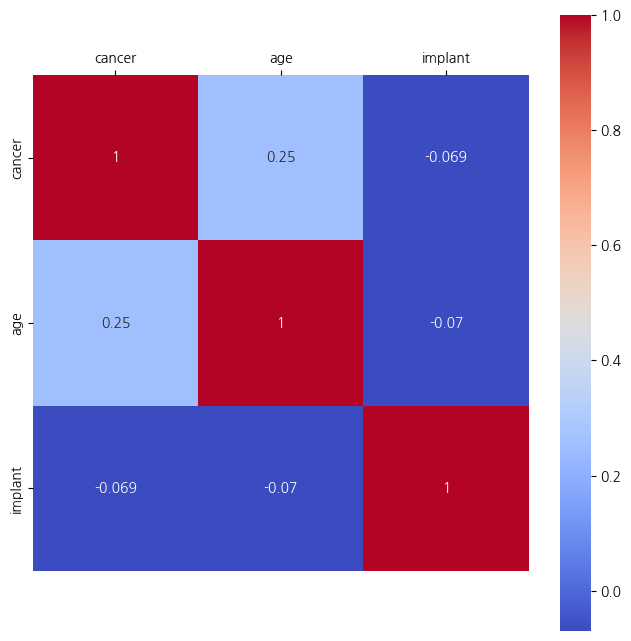

In [127]:
# 변수 선택
selected_variables = ['cancer', 'age', 'implant']

# 선택된 변수들에 대한 상관 행렬 계산
correlation_matrix = train_data[selected_variables].corr()

# 상관 행렬 시각화
plt.figure(figsize=(8, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
ax.xaxis.tick_top()
plt.show()


In [ ]:
'''
[Explore Data]
I want you to act as a data scientist and code for me. 
I have a DataFrame variable called “train_data”. Please write code for data exploration scripts using [Pandas, Seaborn, and Matplotlib].

===INFO===
data_dir = '/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset'
data_dir = '/content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset'
train_image = 'train_images'

Explore data analysis for demography step by step using the following procedure.
  1. Number of TOTAL images, 
  2. Total unique patients, 
  3. Total unique images,
  4. Statistics: Images per Patient,
  5. Image records count per laterality,
  6. Image records count per view,
'''

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 경로와 파일명
data_dir = '/workspace/sunggu/7.Mentor/Med_ChatGPT_tutorial/dataset'
train_image = 'train_images'

# 1. 전체 이미지 수
total_images = len(train_data)
print("전체 이미지 수:", total_images)

# 2. 고유한 환자 수
unique_patients = train_data['patient_id'].nunique()
print("고유한 환자 수:", unique_patients)

# 3. 고유한 이미지 수
unique_images = train_data['image_id'].nunique()
print("고유한 이미지 수:", unique_images)

# 4. 환자별 이미지 통계
images_per_patient = train_data.groupby('patient_id')['image_id'].count()
print("환자별 이미지 통계:")
print(images_per_patient.describe())

# 5. 좌우 여백별 이미지 레코드 수
image_count_by_laterality = train_data['laterality'].value_counts()
print("좌우 여백별 이미지 레코드 수:")
print(image_count_by_laterality)

# 6. 이미지 방향별 이미지 레코드 수
image_count_by_view = train_data['view'].value_counts()
print("이미지 방향별 이미지 레코드 수:")
print(image_count_by_view)


전체 이미지 수: 2316
고유한 환자 수: 1574
고유한 이미지 수: 2316
환자별 이미지 통계:
count    1574.000000
mean        1.471410
std         0.769001
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: image_id, dtype: float64
좌우 여백별 이미지 레코드 수:
laterality
L    1198
R    1118
Name: count, dtype: int64
이미지 방향별 이미지 레코드 수:
view
MLO    1178
CC     1135
AT        3
Name: count, dtype: int64


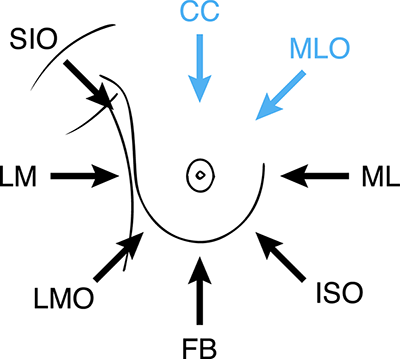

### http://med_physics.i-do.science/topics/diagnose_breast/

In [ ]:
# axillary tail (AT)
# craniocaudal  (CC) 
# lateromedial  (LM)
# lateromedial oblique (LMO)
# mediolateral  (ML)
# mediolateral oblique (MLO)

# CSV에 Path 삽입, train/valid split

In [ ]:
'''
[Complete the python code]
I want you to act as a coder in Python and code for me. 

===INFO===
data_dir = '/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset'
data_dir = '/content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset'
train_image = 'train_images'

Please conduct step by step using the following procedure.
    1. create a path column in train_data and test_data which are dataframe. The path consists of a combination of 'patient_id' and 'image_id' in train_data: "{data_dir}/train_image/{patient_id}/{image_id} +.dcm”
    2. split the train into train and valid. The ratio is 8 to 2.
    3. 'mode' colume is created in train_data and test_data. The mode is 'train', 'valid', 'test'.
    4. concatenate train, valid into one dataframe called 'rsna_data.csv'.
    5. create code for loading the csv file.
'''

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 디렉토리 경로 및 train 이미지 폴더 설정
data_dir = '/workspace/sunggu/7.Mentor/Med_ChatGPT_tutorial/dataset'
train_image = 'train_images'

# 1. train_data에 path 열 생성
train_data['path'] = f"{data_dir}/train_image/" + train_data['patient_id'].astype(str) + "/" + train_data['image_id'].astype(str) + ".dcm"

# 2. train을 train, valid, test로 분할 (비율: 8:1:1)
train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=42)
valid_data, test_data  = train_test_split(valid_data, test_size=0.5, random_state=42)

# 분할 결과 확인
print("학습용 데이터 개수: ",   len(train_data))
print("최적화용 데이터 개수: ", len(valid_data))
print("검증용 데이터 개수: ",   len(test_data))

# 3. train_data와 valid_data에 mode 열 생성
train_data['mode'] = 'train'
valid_data['mode'] = 'valid'
test_data['mode']  = 'test'

# # 4. train_data와 valid_data를 연결하여 rsna_data.csv 파일 생성
# rsna_data = pd.concat([train_data, valid_data, test_data], axis=0)
# rsna_data.to_csv(data_dir + '/rsna_data.csv', index=False)

# 5. CSV 파일을 로드하는 코드 작성
rsna_data = pd.read_csv(data_dir + '/rsna_data.csv')
print("CSV 파일에서 데이터를 로드하였습니다.")

CSV 파일에서 데이터를 로드하였습니다.


# EDA from the dicom

In [185]:
# read the dicom file
dicom_data = pydicom.dcmread(train_data['path'].iloc[0])
dicom_data

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10130.1.388811999
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10130.1.388811999
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183942.402329'
(0010, 0020) Patient ID                          LO: '10130'
(0018, 11a0) Body Part Thickness                 DS: '73.0'
(001

In [ ]:
'''
[Explore Data]
I want you to act as a data scientist and code for me. 
Please parse the the dicom files and stack the information for dataframe.
Please use the multiprocessing for quick parsing.
save all the information parsed from the dicom images into list format.

===INFO===
data_dir = '/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset'
data_dir = '/content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset'
dataframe variable = train_data (including dicom image path)

Here's the distribution of what we want to know: 
	1. image shape, 
	2. min and max intensity of image,
	3. Rescale Type, 
	4. VOI LUT Function
	5. Window Center
    6. Window Width
'''

In [183]:
import os
import pandas as pd
import pydicom
from multiprocessing import Pool

data_dir = '/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset'
dataframe_variable = train_data  # DICOM 이미지 경로를 포함하는 데이터프레임 변수

def parse_dicom(file_path):
    dicom_data = pydicom.dcmread(file_path)
    image_shape = dicom_data.pixel_array.shape
    intensity_min = dicom_data.pixel_array.min()
    intensity_max = dicom_data.pixel_array.max()
    rescale_type = dicom_data.RescaleType if 'RescaleType' in dicom_data else None
    voi_lut_function = dicom_data.VOILUTFunction if 'VOILUTFunction' in dicom_data else None
    window_center = dicom_data.WindowCenter if 'WindowCenter' in dicom_data else None
    window_width = dicom_data.WindowWidth if 'WindowWidth' in dicom_data else None
    
    return {
        'file_path': file_path,
        'image_shape': image_shape,
        'intensity_min': intensity_min,
        'intensity_max': intensity_max,
        'rescale_type': rescale_type,
        'voi_lut_function': voi_lut_function,
        'window_center': window_center,
        'window_width': window_width
    }

def process_dicom_files(file_paths):
    results = []
    with Pool() as pool:
        results = pool.map(parse_dicom, file_paths)
    return results

# DICOM 이미지 경로 가져오기
dicom_paths = dataframe_variable['path'].tolist()

# DICOM 이미지 파일 파싱 및 정보 추출
parsed_info = process_dicom_files(dicom_paths)

# 추출한 정보로 데이터프레임 생성
parsed_df = pd.DataFrame(parsed_info)

In [184]:
# 데이터프레임 저장
save_path = os.path.join(data_dir, 'parsed_info.csv')
parsed_df.to_csv(save_path, index=False)
print(f"정보를 데이터프레임으로 저장하였습니다. 경로: {save_path}")


정보를 데이터프레임으로 저장하였습니다. 경로: /workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset/parsed_info.csv


In [179]:
parsed_df

file_path   image_shape   
0  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)  \
1  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)   
2  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)   
3  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)   
4  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)   
5  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)   
6  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)   
7  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)   
8  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)   
9  /workspace/sunggu/0.Challenge/Med_tutorial_Cha...  (4096, 3328)   

   intensity_min  intensity_max rescale_type voi_lut_function  window_center   
0              0           4095           US             None         2047.0  \
1              0           4095           US             None         2047.0   
2              0           4095           US             None         2047.0   
3              0           4095           US             None         2047.0   
4              0           4095           US             None         2047.0   
5              0           4095           US             None         2047.0   
6              0           4095           US             None         2047.0   
7              0           4095           US             None         2047.0   
8              0           4095           US             None         2047.0   
9              0           4095           US             None         2047.0   

   window_width  
0        4096.0  
1        4096.0  
2        4096.0  
3        4096.0  
4        4096.0  
5        4096.0  
6        4096.0  
7        4096.0  
8        4096.0  
9        4096.0

In [181]:
parsed_df['window_center'].value_counts()

window_center
2047.0    10
Name: count, dtype: int64

In [182]:
parsed_df['window_width'].value_counts()

window_width
4096.0    10
Name: count, dtype: int64

In [169]:
print(parsed_df['rescale_type'].value_counts())


rescale_type
US    10
Name: count, dtype: int64


In [170]:
print(parsed_df['image_shape'].value_counts())

Series([], Name: count, dtype: int64)


In [ ]:
print(parsed_df['voi_lut_function'].value_counts())

In [171]:
parsed_df.describe()

intensity_min  intensity_max
count           10.0           10.0
mean             0.0         4095.0
std              0.0            0.0
min              0.0         4095.0
25%              0.0         4095.0
50%              0.0         4095.0
75%              0.0         4095.0
max              0.0         4095.0

### 참고: https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial, https://ballentain.tistory.com/53

In [186]:
# read the dicom file
dicom_data = pydicom.dcmread(train_data['path'].iloc[0])
dicom_data

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10130.1.388811999
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10130.1.388811999
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183942.402329'
(0010, 0020) Patient ID                          LO: '10130'
(0018, 11a0) Body Part Thickness                 DS: '73.0'
(001

In [ ]:
'''
I want you to act as a data scientist and code for me. 
Please generate code for preprocessing DICOM images using the apply_modality_lut and apply_voi_lut functions in the pidicom.pixel_data_handlers.util module.
	1. Apply the modality lookup table using the apply_modality_lut function. The first factor of the function passes the dicom_data.pixel_array, and the second factor passes the dicom_data. The results are stored in variable a.
	2. Apply the VOI lookup table using the apply_voi_lut function. The first factor of the function passes the variable a, and the second factor passes the icon_data. The results are stored in variable b.
'''

In [190]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

# DICOM 파일 읽기
dicom_data = pydicom.dcmread(train_data['path'].iloc[100])

# 모달리티 룩업 테이블 적용
a = apply_modality_lut(dicom_data.pixel_array, dicom_data)  # RescaleSlope * pixel_array + RescaleIntercept, But 보통 slope = 1, intercept = 0 이 default가 많음.
                                                            # a = int(dicom_data.RescaleSlope) * dicom_data.pixel_array + int(dicom_data.RescaleIntercept)
                                                            # US = Unspecified.
# VOI 룩업 테이블 적용                                              
b = apply_voi_lut(a, dicom_data)                            # Pixel Representation, Bits Stored 조정

[[65344.51449796 65344.51449796 65344.51449796 ... 13579.44127394
  10115.89914257 10273.57159303]
 [65344.51449796 65344.51449796 65344.51449796 ... 12694.7659122
  11092.06752048 10791.58191257]
 [65344.51449796 65344.51449796 65344.51449796 ... 12324.02385566
  11925.88048633 10433.23895537]
 ...
 [65344.51449796 65344.51449796 65344.51449796 ... 61199.44643245
  59851.19502878 58847.73510002]
 [65344.51449796 65344.51449796 65344.51449796 ... 60845.61123607
  59716.67444878 59085.84654581]
 [65344.51449796 65344.51449796 65344.51449796 ... 60700.03107135
  59851.19502878 59295.72702195]]


Just pixel_array         =  3396 1158
After apply_modality_lut =  3396.0 1158.0


Text(0.5, 1.0, 'pixel array image')

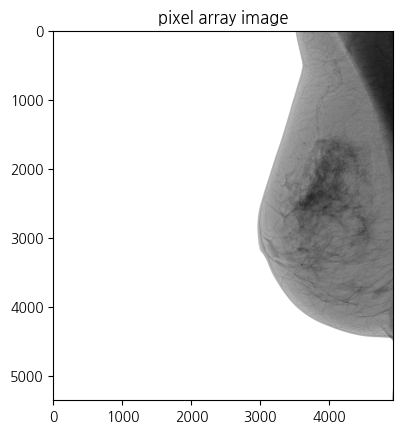

In [191]:
plt.imshow(a, 'gray')
print("Just pixel_array         = ", dicom_data.pixel_array.max(), dicom_data.pixel_array.min())
print("After apply_modality_lut = ", a.max(), a.min())
plt.title('pixel array image')

After apply_modality_lut =  3396.0 1158.0
After apply_voi_lut      =  65344.51449795578 5653.076713331999


Text(0.5, 1.0, 'voi image')

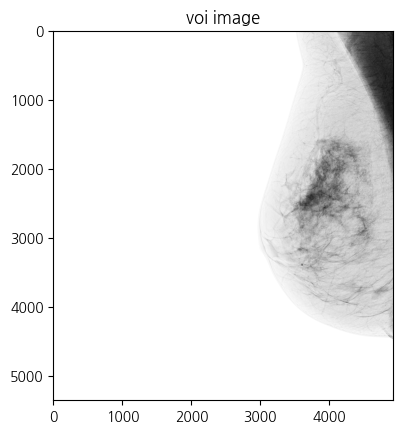

In [192]:
plt.imshow(b, 'gray')
print("After apply_modality_lut = ", a.max(), a.min())
print("After apply_voi_lut      = ", b.max(), b.min())
plt.title('voi image')

# - 고찰

- 나이에 따라서 영향을 미칠수있다.                 -> 마지막 classifier에 연결? 
- L, R에 편견이 없다.                            -> horizontal augmentation 사용 가능.
- 배경과 전경에 intensity 반전에 강건해야 한다.    -> Invert augmentation으로 해결 가능.
- intensity outlier 제외                         -> percentile로 outlier pixel value 제거


# Set Dataset

In [1]:
cd /workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/

/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT


In [2]:
'''
[Define Dataset]
I want you to act as a coder in Python and code for me. 
Please help with creating the dataset class that process image processing and augmentation based on binary classification deep learning framework.

===INFO===
data_dir = '/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset'
data_dir = '/content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset'
csv_file = 'rsna_data.csv'
target_class = 'cancer'

Code for creating the RSNA breast cancer dataset class called "RSNA_Dataset". 
This code is a custom dataset class that inherits "Dataset" from PyTorch. 
The dataset can be initialized in either "train" or "valid" mode and reads the file path and label information from the corresponding CSV file.

Each entry in the dataset is defined as follows:
- Read the DICOM file using the image path.
- Apply the Modality Lookup Table (LUT) and Value of Interest (VOI) LUT for the pixel array in the DICOM file.
- Returns the read image and the corresponding label.

In addition to the dataset class, we define an compose transform function that performs data preprocessing and augmentation through the "get_transforms" function using Albumentation Library. 

Please conduct step by step using the following procedure.
	1. In the training mode, perform image resizing (224x224), minmax normalization, change_to_uint8, Contrast Limited Adaptive Histogram Equation (CLAHE), change_to_float32, horizontal flip, brightness and contrast adjustment, Shift-Scale-Rotate conversion, image inversion, minmax normalization, and tensor conversion. 
    2. In validation mode, perform image resizing (224x224), minmax normalization, change_to_uint8, fixed CLAHE, change_to_float32, minmax normalization, and tensor conversion. 
	3. Finally, create "train_dataset" and "valid_dataset" and create a DataLoader that loads them into "train_loader" and "valid_loader". "train_loader" and "valid_loader" can be used for training and validation.
'''

'\n[Define Dataset]\nI want you to act as a coder in Python and code for me. \nPlease help with creating the dataset class that process image processing and augmentation based on binary classification deep learning framework.\n\n===INFO===\ndata_dir = \'/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset\'\ncsv_file = \'rsna_data.csv\'\ntarget_class = \'cancer\'\n\nCode for creating the RSNA breast cancer dataset class called "RSNA_Dataset". \nThis code is a custom dataset class that inherits "Dataset" from PyTorch. \nThe dataset can be initialized in either "train" or "valid" mode and reads the file path and label information from the corresponding CSV file.\n\nEach entry in the dataset is defined as follows:\n- Read the DICOM file using the image path.\n- Apply the Modality Lookup Table (LUT) and Value of Interest (VOI) LUT for the pixel array in the DICOM file.\n- Returns the read image and the corresponding label.\n\nIn addition to the dataset class, we define an compose tra

In [3]:
import os
import pandas as pd
import pydicom
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut
import cv2
import skimage

In [4]:
class RSNA_Dataset(Dataset):
    def __init__(self, data_dir, csv_file, target_class, mode="train"):
        self.data_dir = data_dir
        self.csv_file = csv_file
        self.target_class = target_class
        self.mode = mode

        # CSV 파일에서 데이터 로드
        self.df = pd.read_csv(os.path.join(self.data_dir, self.csv_file))
        
        # 해당하는 모드에 따라 데이터 필터링
        self.filtered_df = self.df[self.df['mode'] == self.mode].reset_index(drop=True)

        # Albumentations 변환 함수 정의
        self.transforms = self.get_transforms()

    def __len__(self):
        return len(self.filtered_df)

    def __getitem__(self, idx):
        # 이미지 경로 및 라벨 가져오기
        img_path = self.filtered_df['path'].iloc[idx]
        label = self.filtered_df[self.target_class].iloc[idx]

        # DICOM 파일 읽기 및 처리
        dcm_data = pydicom.dcmread(img_path)
        temp_img = apply_modality_lut(dcm_data.pixel_array, dcm_data)
        image = apply_voi_lut(temp_img, dcm_data)

        # 라벨을 Tensor로 변환
        label = torch.tensor(label).float().unsqueeze(0)

        # 채널 차원 추가
        image = np.expand_dims(image, axis=-1)

        # Albumentations 변환 수행
        transformed = self.transforms(image=image)
        image = transformed['image']

        return image, label

    def get_transforms(self):
        if self.mode == "train":
            return A.Compose([
                A.Resize(224, 224),
                A.Lambda(image=self.min_max_normalization, always_apply=True),
                A.Lambda(image=self.change_to_uint8, always_apply=True),
                A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), always_apply=True),
                A.Lambda(image=self.change_to_float32, always_apply=True),
                
                # Augmentation
                A.HorizontalFlip(p=0.5),
                A.RandomBrightnessContrast(p=0.5),
                A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=30, p=0.5),
                A.InvertImg(p=0.5),

                # Normalize
                A.Lambda(image=self.min_max_normalization, always_apply=True),
                A.Normalize(max_pixel_value=1.0, mean=0.5, std=0.5),
                ToTensorV2()
            ])
        else:
            return A.Compose([
                A.Resize(224, 224),
                A.Lambda(image=self.min_max_normalization, always_apply=True),
                A.Lambda(image=self.change_to_uint8, always_apply=True),
                A.Lambda(image=self.fixed_clahe, always_apply=True),
                A.Lambda(image=self.change_to_float32, always_apply=True),

                # Normalize
                A.Lambda(image=self.min_max_normalization, always_apply=True),
                A.Normalize(max_pixel_value=1.0, mean=0.5, std=0.5),
                ToTensorV2()
            ])

    def min_max_normalization(self, image, **kwargs):
        if np.unique(image).size == 1:
            return image    
        image = image.astype('float32')
        image -= image.min()
        image /= image.max()
        return image

    def fixed_clahe(self, image, **kwargs):
        clahe_mat = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe_mat.apply(image)

    def change_to_uint8(self, image, **kwargs):
        return skimage.util.img_as_ubyte(image)

    def change_to_float32(self, image, **kwargs):
        return skimage.util.img_as_float32(image)


In [5]:
data_dir = '/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset'
csv_file = 'rsna_data.csv'
target_class = 'cancer'

# 학습용 데이터셋 생성
train_dataset = RSNA_Dataset(data_dir, csv_file, target_class, mode='train')
# 검증용 데이터셋 생성
valid_dataset = RSNA_Dataset(data_dir, csv_file, target_class, mode='valid')

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=10, shuffle=False, num_workers=0)


In [6]:
t_image, t_label = next(iter(train_loader))
v_image, v_label = next(iter(valid_loader))


In [7]:
print(v_label.shape)
print(t_label.shape)

torch.Size([10, 1])
torch.Size([10, 1])


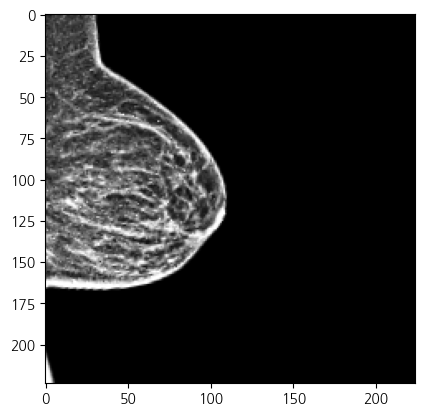

tensor(1.) tensor(-1.)


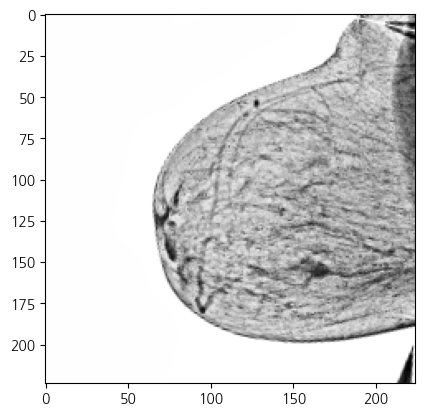

tensor(1.) tensor(-1.)


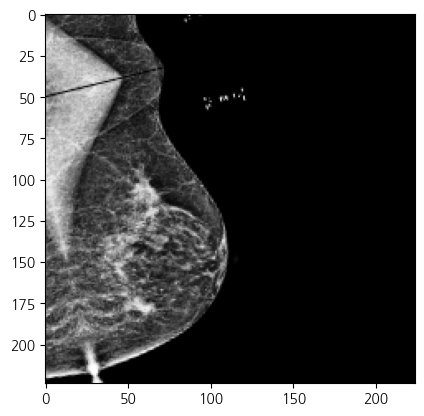

tensor(1.) tensor(-1.)


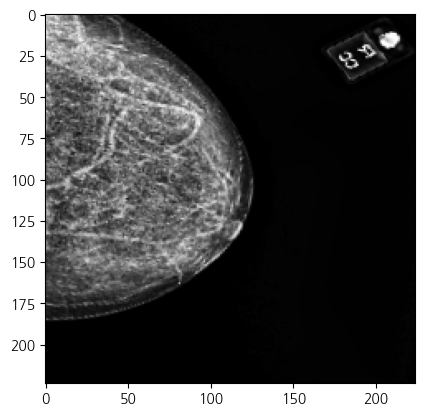

tensor(1.) tensor(-1.)


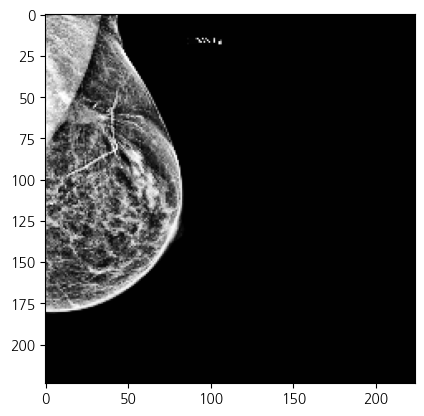

tensor(1.) tensor(-1.)


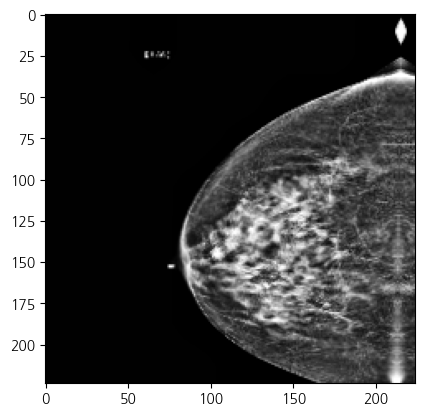

tensor(1.) tensor(-1.)


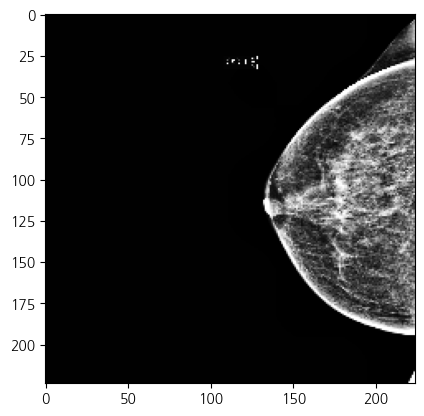

tensor(1.) tensor(-1.)


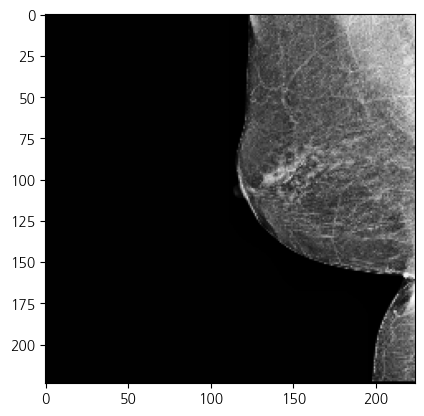

tensor(1.) tensor(-1.)


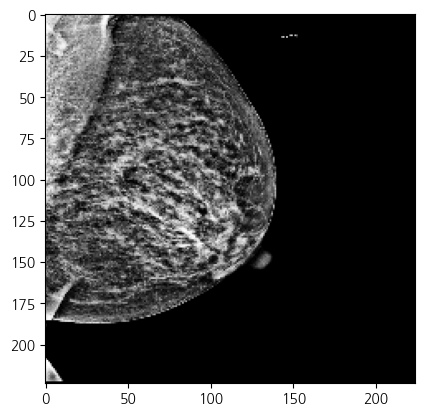

tensor(1.) tensor(-1.)


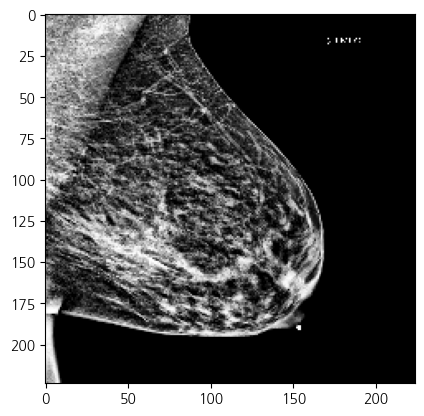

tensor(1.) tensor(-1.)


In [8]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(t_image[i][0], 'gray')
    plt.show()

    print(t_image[i][0].max(), t_image[i][0].min())

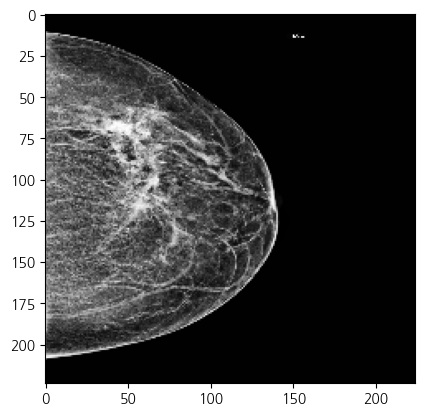

tensor(1.) tensor(-1.)


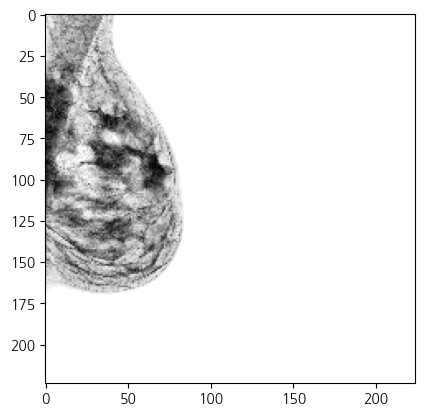

tensor(1.) tensor(-1.)


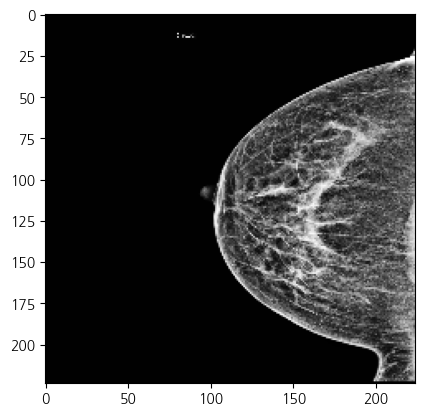

tensor(1.) tensor(-1.)


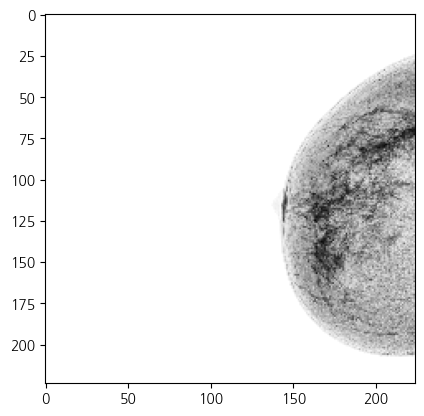

tensor(1.) tensor(-1.)


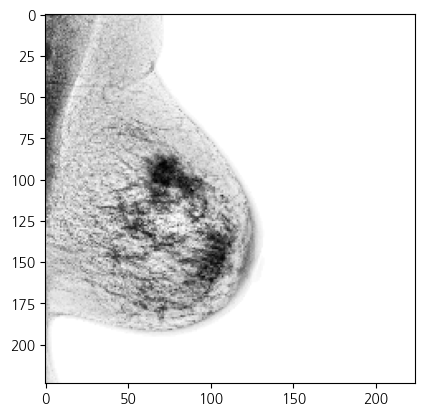

tensor(1.) tensor(-1.)


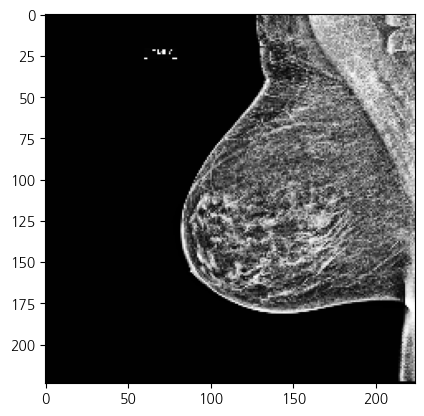

tensor(1.) tensor(-1.)


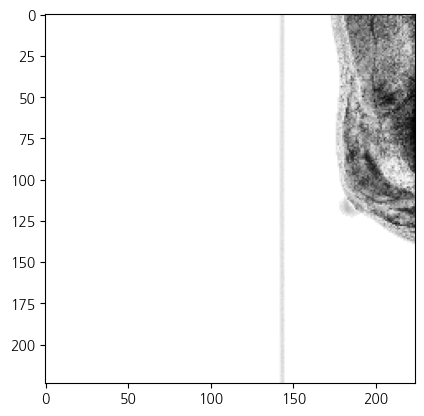

tensor(1.) tensor(-1.)


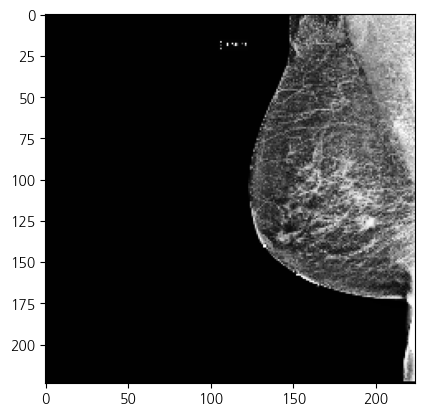

tensor(1.) tensor(-1.)


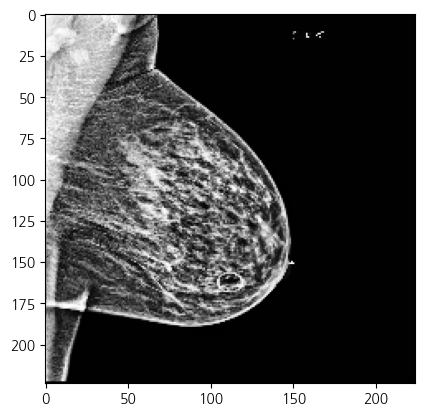

tensor(1.) tensor(-1.)


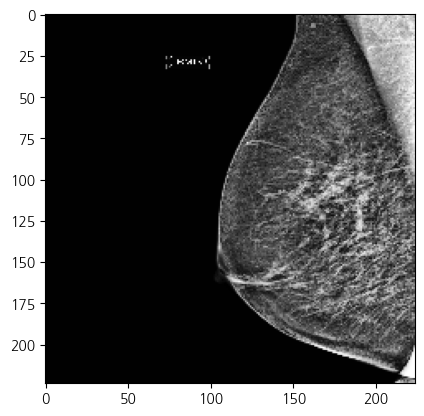

tensor(1.) tensor(-1.)


In [9]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(v_image[i][0], 'gray')
    plt.show()

    print(v_image[i][0].max(), v_image[i][0].min())